In [1]:
# you may, or not, need the following imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import torchvision
import torch
# from PIL import Image

# Homework 1 - Intro

In [2]:
# Helper functions, just execute and ignore
image_link = "https://upload.wikimedia.org/wikipedia/commons/b/b1/Colouring_pencils.jpg"


def download_image(image_link: str) -> str:
    # Download the image and save it locally as a .jpg file
    response = requests.get(image_link)
    local_filename = "downloaded_image.jpg"
    with open(local_filename, "wb") as f:
        f.write(response.content)
    return local_filename


## Exercise 1
Use OpenCV/Numpy/PyTorch to load and image. Then split the image into its RGB channels. Display the channels using matplotlib.

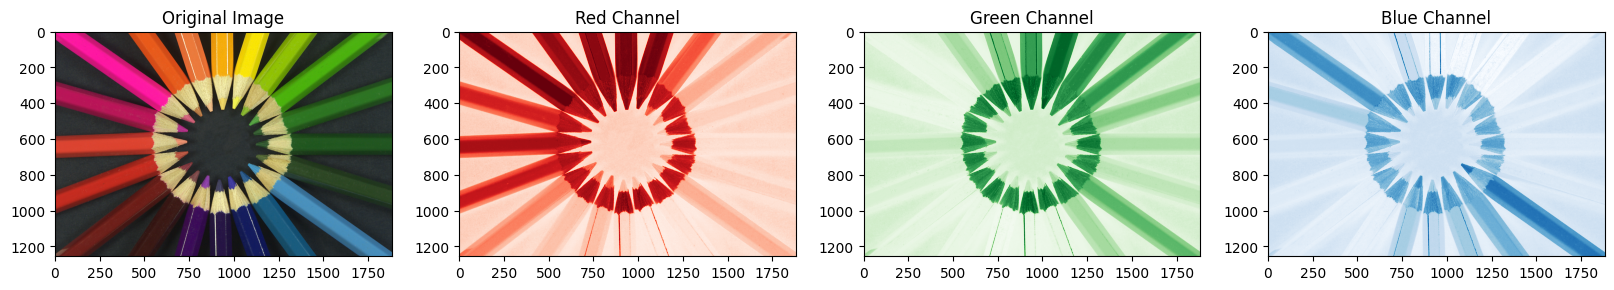

In [3]:
def exercise_1(image_path: str):
    """
    1. `image_path` is a string that contains the path to the image file.
    2. Read the image file into memory (I recommend using OpenCV or Matplotlib)
    3. Split the image into its RGB channels (be careful about the order of the channels, matplotlib and OpenCV use different channel ordering)
    4. Display the channels using matplotlib

    OpenCV uses BGR format for historical reasons - it matched the physical data order
    from Bayer sensor cameras in the 90s when OpenCV was created. Though not technically
    needed today, BGR remains for backwards compatibility.

    Key differences between OpenCV and Matplotlib solutions:
    - OpenCV reads in BGR, needs conversion to RGB; Matplotlib reads directly in RGB
    - OpenCV better for image processing and supports more formats
    - Matplotlib simpler for basic visualization but slower for processing

    The image was changed to better demonstrate the differences between RGB channels
    and make the channel separation more visible in the visualization.
    """

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Split image into RGB channels (each channel is a 2D array of pixel intensities)
    r = image[:, :, 0]  # red
    g = image[:, :, 1]  # green
    b = image[:, :, 2]  # blue

    plt.figure(figsize=(20, 5))

    plt.subplot(141)
    plt.imshow(image)
    plt.title("Original Image")

    plt.subplot(142)
    plt.imshow(r, cmap="Reds")
    plt.title("Red Channel")

    plt.subplot(143)
    plt.imshow(g, cmap="Greens")
    plt.title("Green Channel")

    plt.subplot(144)
    plt.imshow(b, cmap="Blues")
    plt.title("Blue Channel")

    plt.show()


exercise_1(download_image(image_link))

## Exercise 2
Calculate the size of the image in memory. 
Print:
- the image size on disk (in KB)
- the image size in memory (in KB)
- the image dimensions
- the image data type (float16/float32/uint8/etc.)
- the device that the image is located on (GPU/CPU/MPS)
Comment on the difference between the image size on disk and the image size in memory. 

In [4]:
def exercise_2(image_path: str):
    """
    1. `image_path` is a string that contains the path to the image file.
    2. Read the image file into memory (
        I recommend using using torchvision or PIL:
        torchvision.io.read_image(...) or Image.open(...)
        )
    3. Calculate and print:
        - the image size on disk
        - the image size in memory (will be larger then on disk, why? :))
        - the image dimensions (aka shape i.e. channels, width, height)
        - the image data type (float16/float32/etc.)
        - the device that the image is located on (GPU/CPU)

    Key differences:
    - CPU vs CUDA: GPU offers faster processing for large images/batches
    - Memory usage: GPU needs extra memory to copy data
    - Loading options:
      * PIL: Basic CPU processing, smaller memory footprint
      * Torchvision: GPU support, tensor format, larger memory usage
      * OpenCV: Fast CPU processing, no direct GPU support

    """
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    file_size = os.path.getsize(image_path) / 1024
    torch_image = torchvision.io.read_image(image_path).to(device)
    size_in_memory = torch_image.nelement() * torch_image.element_size() / 1024
    shape = torch_image.shape
    
    print(f"File size on disk: {file_size} KB")
    print(f"Image size in memory: {size_in_memory} KB")
    print(f"Image dimensions: {shape}")
    print(f"Device: {device}")


exercise_2(download_image(image_link))

File size on disk: 1430.947265625 KB
Image size in memory: 6932.53125 KB
Image dimensions: torch.Size([3, 1256, 1884])
Device: cuda


## Exercise 3
Simple OpenCV image processing.
Read the image, convert it to grayscale, then convert the 50% brightest pixels to white and the 50% darkest pixels to black. Finally, display the image

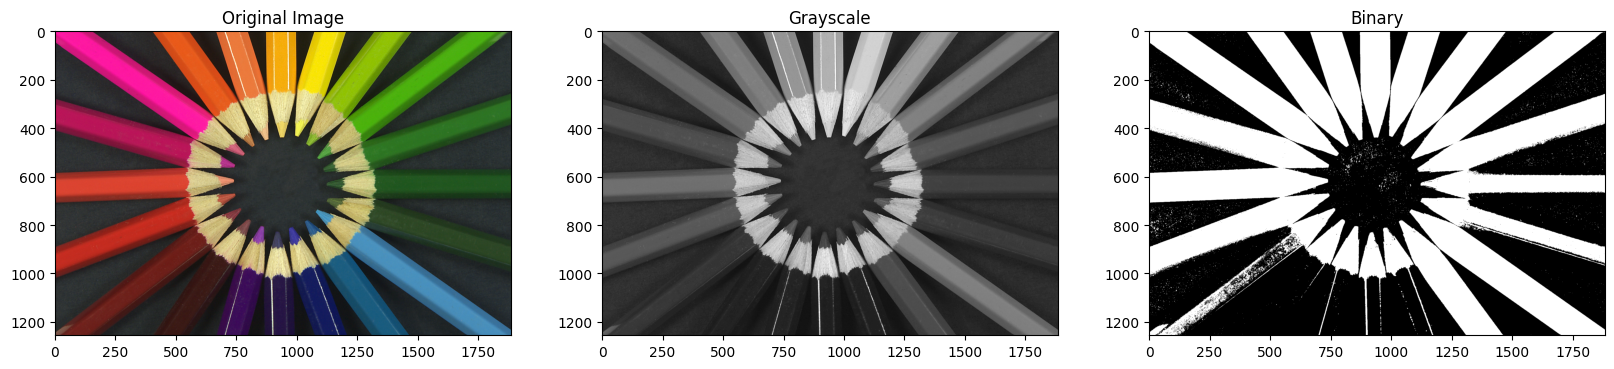

In [5]:
def exercise_3(image_path):
    """
    1. Read the image
    2. Convert it to grayscale (one-channel image)
    3. Convert the 50% brightest pixels to white and the 50% darkest pixels to black.
    4. Display the image
    """
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    binary = np.zeros_like(gray)
    binary[gray > np.median(gray)] = 255
    
    plt.figure(figsize=(20, 5))
    
    plt.subplot(131)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    
    plt.subplot(132)
    plt.imshow(gray, cmap="gray")
    plt.title("Grayscale")
    
    plt.subplot(133)
    plt.imshow(binary, cmap="gray")
    plt.title("Binary")
    
    plt.show()


exercise_3(download_image(image_link))